# Artist Performance Analytics for Informed Decision-Making! 🎸
Hello! Below is my capstone project, where the objective is to leverage data analytics techniques to analyze past artist performances and provide actionable insights for optimizing future tour planning and fan engagement initiatives. By harnessing data on cities, countries, venues, ticket counts, dates, venue capacities, and seat availability, the project aims to enhance decision-making processes within the artist management company, Ten Atoms.

## Data Acquisition 🧺
Here we are importing necessary libraries. We then have the dataset read into a dataframe, called "artists".

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [42]:
# Reading the csv file into the dataframe
artists = pd.read_csv('artists_data.csv', na_values=['N/A'])

In [43]:
artists.head()

,Date,Artist,City,Region/State/Province,Country,Venue,Capacity,Tickets Sold,Tickets Left
0,"May 15, 2019",Band A,Brooklyn,New York,United States,Knitting Factory,325.0,325.0,0
1,"June 21, 2019",Band A,Austin,Texas,United States,Antone's,400.0,400.0,0
2,"June 28, 2019",Band A,Dallas,Texas,United States,The Kessler Theater,600.0,508.0,92
3,"June 29, 2019",Band A,Bentonville,Arkansas,United States,Crystal Bridges,2000.0,187.0,1813
4,"July 4, 2019",Band A,Toronto,Ontario,Canada,Drake Hotel,200.0,170.0,30


In [44]:
artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   545 non-null    object 
 1   Artist                 545 non-null    object 
 2   City                   545 non-null    object 
 3   Region/State/Province  473 non-null    object 
 4   Country                545 non-null    object 
 5   Venue                  545 non-null    object 
 6   Capacity               544 non-null    float64
 7   Tickets Sold           544 non-null    float64
 8   Tickets Left           545 non-null    int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 38.4+ KB


In [45]:
artists.shape

(545, 9)

This displays basic information about the dataframe. It reveals the number of columns, number of rows, column names, number of non-nulls, and data types.

### Column Descriptions 📖
1. Date: The date of the performance.
2. Artist: The name of the artist who performed. (Band A-C ** *Real Band Names are hidden due to confidentiality!* **)
3. City: The city where the performance took place.
4. Region/State/Provine: The region/state/province where the performance took place.
5. Country: The country where the performance took place.
6. Venue: The venue of the performance.
7. Capacity: The maximum number of seats available.
8. Tickets Sold: The number of sold tickets for the performance.
9. Tickets Left: The number of unsold tickets for the performance. ** *A.K.A (Capacity - Tickets Sold = Tickets Left)* **

## Data Cleaning 🫧
Here we will clean the dataframe by identifying any missing values, which we previously defined as "N/A".

In [46]:
print("\nMissing Values:")
print(artists.isnull().sum())


Missing Values:
Date                      0
Artist                    0
City                      0
Region/State/Province    72
Country                   0
Venue                     0
Capacity                  1
Tickets Sold              1
Tickets Left              0
dtype: int64


Due to the size of the dataset, we cannot drop rows with missing values. Instead, we will keep the missing values, since they only indicate the lack of state/region/province of a city in the "Region/State/Province" column.

This will help preserve the integrity of the dataset and ensure that we can analyze as much data as possible. 

In [47]:
artists.dropna(subset=['Capacity','Tickets Sold'], inplace=True)

In [48]:
print("\nMissing Values:")
print(artists.isnull().sum())


Missing Values:
Date                      0
Artist                    0
City                      0
Region/State/Province    72
Country                   0
Venue                     0
Capacity                  0
Tickets Sold              0
Tickets Left              0
dtype: int64


However, we will drop rows with missing values in the columns "Capacity" and "Tickets Sold" since those are numerical values that we are not able to determine.

In [49]:
# Applying .duplicate() method to identify
duplicate_rows = artists.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()

# Print the number of duplicate rows
print("Number of duplicate rows:", num_duplicates)

# Display the duplicate rows (if any)
if num_duplicates > 0:
    duplicate_data = artists[duplicate_rows]
    print("Duplicate Rows:")
    print(duplicate_data)
else:
    print("No duplicate rows found.")

Number of duplicate rows: 0
No duplicate rows found.


Here we are checking for any duplicate rows to prevent biased analysis and help maintain data quality and reliability.

No duplicate rows were found, so we are **good to go!**

In [50]:
# Calculate 'Tickets Left' based on 'Capacity' and 'Tickets Sold'
calculated_tickets_left = artists['Capacity'] - artists['Tickets Sold']

# Compare calculated 'Tickets Left' with actual 'Tickets Left'
consistent_calculation = (calculated_tickets_left == artists['Tickets Left'])

# Check if all calculations are consistent
if consistent_calculation.all():
    print("Calculation is consistent with 'Tickets Left' column.")
else:
    print("Calculation is not consistent with 'Tickets Left' column for some rows.")
    # Display rows where calculation is inconsistent
    inconsistent_rows = artists[~consistent_calculation]
    print("Inconsistent Rows:")
    print(inconsistent_rows)

Calculation is consistent with 'Tickets Left' column.


Here we are ensuring that all recorded "Tickets Left" values are consistent.

Yay! **Calculations are consistent**.

## Exploratory Data Analysis (EDA) 🔍
Here we will perform exploratory data analysis which is a critical step in understanding the main characteristics of the dataset. 

In [51]:
# Summary statistics for numerical columns
summary_stats = artists.describe()
print("Summary Statistics:")
print(summary_stats)

# Unique values for categorical columns
unique_values_city = artists['City'].unique()
unique_values_rsp = artists['Region/State/Province']
unique_values_country = artists['Country'].unique()
print("Unique Cities:", unique_values_city)
print("Unique Region/State/Province:", unique_values_rsp)
print("Unique Countries:", unique_values_country)

# Count of unique values in categorical columns
city_counts = artists['City'].value_counts()
rsp_counts = artists['Region/State/Province'].value_counts()
country_counts = artists['Country'].value_counts()

print("City Counts:")
print(city_counts)
print("Region/State/Province Counts:")
print(rsp_counts)
print("Country Counts:")
print(country_counts)

Summary Statistics:
          Capacity  Tickets Sold  Tickets Left
count   544.000000    544.000000    544.000000
mean   1035.178309    725.253676    309.924632
std     890.595383    675.987241    551.256148
min      50.000000     12.000000   -350.000000
25%     500.000000    334.000000      0.000000
50%     750.000000    524.500000     97.000000
75%    1200.000000    852.250000    419.750000
max    6227.000000   5487.000000   4727.000000
Unique Cities: ['Brooklyn' 'Austin' 'Dallas' 'Bentonville' 'Toronto' 'Burlington'
 'Pittsburgh' 'Columbus' 'Louisville' 'Nashville' 'Davenport'
 'Minneapolis' 'Spring Green' 'Evanston' 'Detroit' 'Boston' 'Port Chester'
 'New York' 'Baton Rouge' 'Birmingham' 'Carrboro' 'Charlottesville'
 'Washington D.C.' 'Fairfield' 'Northampton' 'Montreal' 'Philadelphia'
 'Amagansett' 'St. Louis' 'Memphis' 'Santa Fe' 'Denver' 'Salt Lake City'
 'Vancouver' 'Bellingham' 'Seattle' 'Portland' 'San Francisco'
 'Los Angeles' 'San Diego' 'Phoenix' 'Tucson' 'San Antonio' 'Ma

We are able to derive the following: 
- **Mean Capacity** = about 1,035
- **Mean Tickets Sold** = about 725
- **Mean Tickets Left** = about 310

- **Min Capacity** = about 50
- **Min Tickets Sold** = about 12
- **Min Tickets Left** = about -350

- **Max Capacity** = about 6,227
- **Max Tickets Sold** = about 5,487
- **Max Tickets Left** = about 4,727

### ✨ Data Visual : Mean, Min, & Max for Capacity, Tickets Sold, & Tickets Left 📊

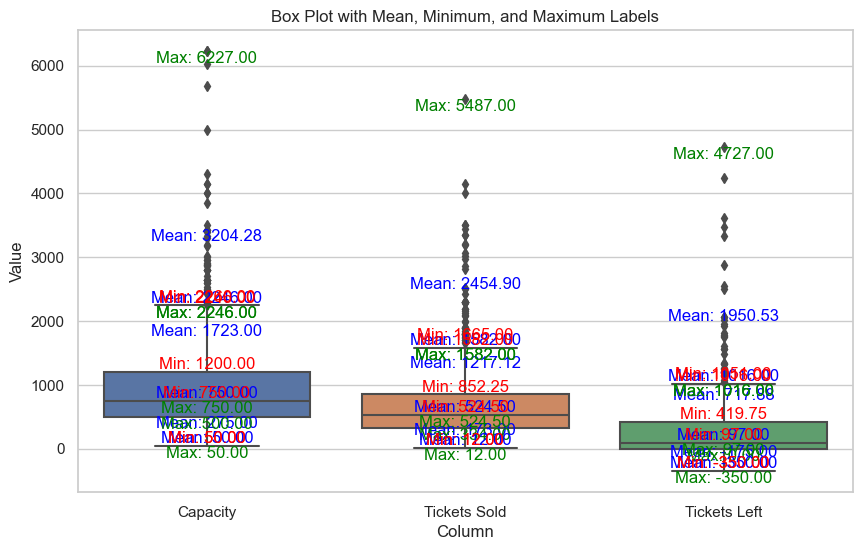

In [52]:
# Identify outliers using box plots
# Create box plot
plt.figure(figsize=(10, 6))
box_plot = sns.boxplot(data=artists[['Capacity', 'Tickets Sold', 'Tickets Left']])

# Add labels for mean, minimum, and maximum
for line in box_plot.lines:
    x, y = line.get_xdata(), line.get_ydata()

    # Add mean label
    plt.text(x.mean(), y.mean(), f'Mean: {y.mean():.2f}', horizontalalignment='center', verticalalignment='bottom', color='blue')

    # Add minimum label
    plt.text(x.mean(), y.min(), f'Min: {y.min():.2f}', horizontalalignment='center', verticalalignment='bottom', color='red')   
    
    # Add maximum label
    plt.text(x.mean(), y.max(), f'Max: {y.max():.2f}', horizontalalignment='center', verticalalignment='top', color='green')
    
# Set title and labels
plt.title("Box Plot with Mean, Minimum, and Maximum Labels")
plt.xlabel("Column")
plt.ylabel("Value")
plt.show()

By creating a box plot we are able to visually interpret the statistics. We can see that there are outliers within our data specifically in our maximum amounts. 

Outliers in these columns suggest the presence of extremely high values relative to the rest of the dataset. This could imply exceptionally large venues (for "Capacity"), very high ticket sales (for "Tickets Sold"), or a significant number of unsold tickets (for "Tickets Left").

In [53]:
# Most played cities
most_played_cities = artists['City'].value_counts().head(5)
print("Top 5 Most Played Cities:")
print(most_played_cities)

# Most played regions/states/provinces
most_played_rsp = artists['Region/State/Province'].value_counts().head(5)
print("\nTop 5 Most Played Regions/States/Provinces:")
print(most_played_rsp)

# Most played countries
most_played_countries = artists['Country'].value_counts().head(5)
print("\nTop 5 Most Played Countries:")
print(most_played_countries)


Top 5 Most Played Cities:
City
Austin           21
Chicago          17
Portland         16
San Francisco    14
Brooklyn         14
Name: count, dtype: int64

Top 5 Most Played Regions/States/Provinces:
Region/State/Province
New York        43
Texas           43
California      38
Illinois        22
Pennsylvania    22
Name: count, dtype: int64

Top 5 Most Played Countries:
Country
United States     463
United Kingdom     22
Germany            11
Canada              9
France              9
Name: count, dtype: int64


### ✨ Data Visual : Top 5 Most Played Cities, Regions/States/Provinces, & Countries 📊

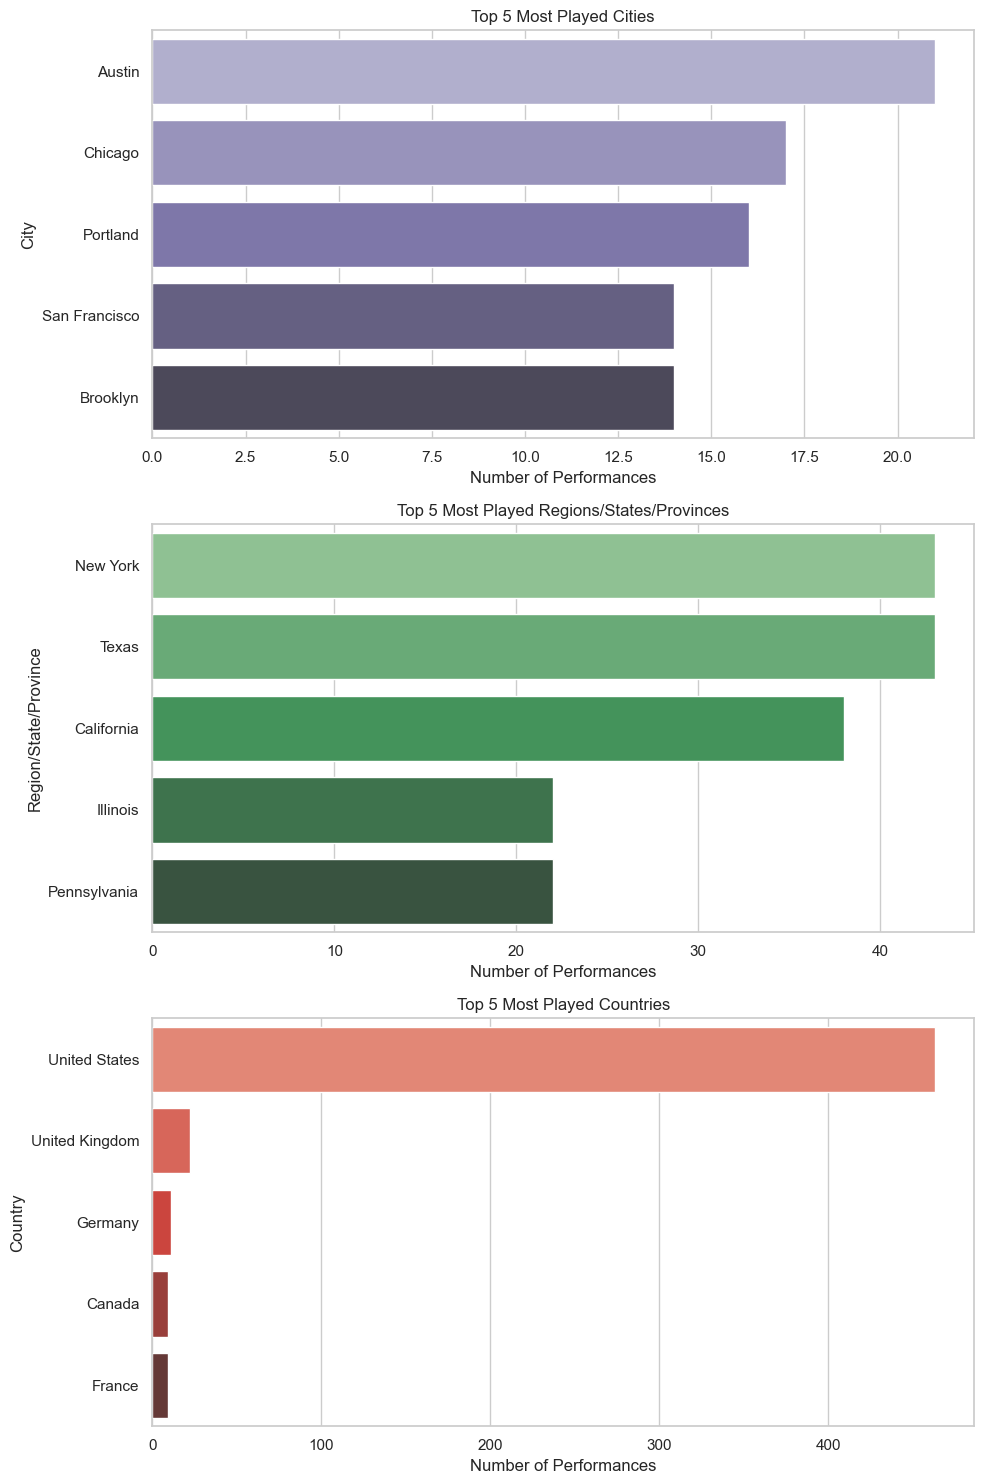

In [54]:
# Set the style of the seaborn plots
sns.set(style="whitegrid")

# Create subplots for cities, regions, and countries
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Most played cities
sns.barplot(x=most_played_cities.values, y=most_played_cities.index, ax=axes[0], palette="Purples_d")
axes[0].set_title('Top 5 Most Played Cities')
axes[0].set_xlabel('Number of Performances')

# Most played regions/states/provinces
sns.barplot(x=most_played_rsp.values, y=most_played_rsp.index, ax=axes[1], palette="Greens_d")
axes[1].set_title('Top 5 Most Played Regions/States/Provinces')
axes[1].set_xlabel('Number of Performances')

# Most played countries
sns.barplot(x=most_played_countries.values, y=most_played_countries.index, ax=axes[2], palette="Reds_d")
axes[2].set_title('Top 5 Most Played Countries')
axes[2].set_xlabel('Number of Performances')

# Adjust layout
plt.tight_layout()
plt.show()

By creating three separate bar graphs we are able to visually interpret the frequency of performances in the top five cities, regions/states/provinces, and countries. 

Understanding which cities, regions/states/provinces, and countires have the highest demand for performances allows artists and event organizers to prioritize these locations when planning future tours. By focusing on areas with a strong fan base, artists can maximize ticket sales and attendance at their performances.

### ✨ Data Visual : Top 10 Most Played Venues & Relationship between Capacity & Ticket Sales 📊

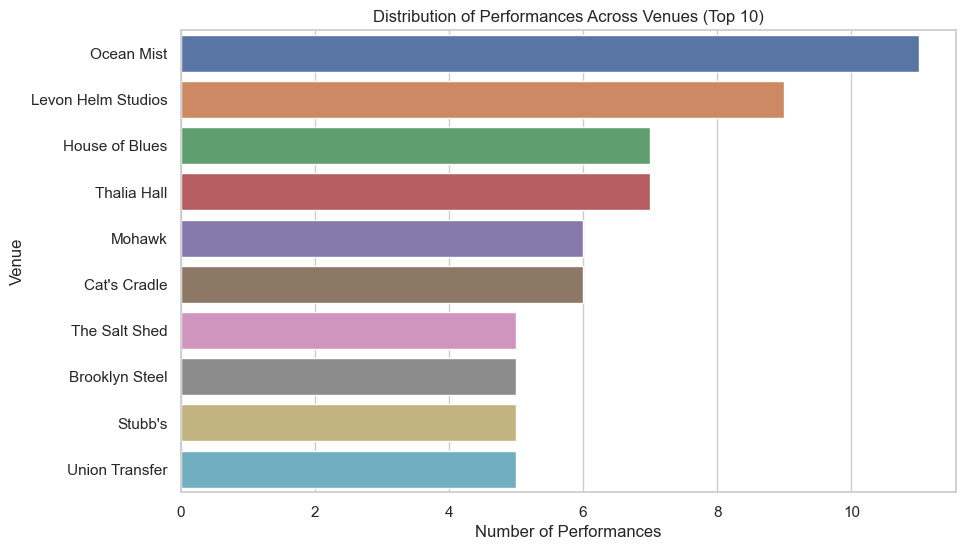

/var/folders/lt/wzll6sr15_qc93yz8697z5b40000gn/T/ipykernel_50379/2394130864.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  scatterplot.text(venue_summary.head(10)['Capacity'][line] + 0.5, venue_summary.head(10)['Tickets Sold'][line], f"{venue_summary.head(10)['Tickets Sold'][line]:,.0f}", horizontalalignment='left', size='medium', color='black', weight='semibold')


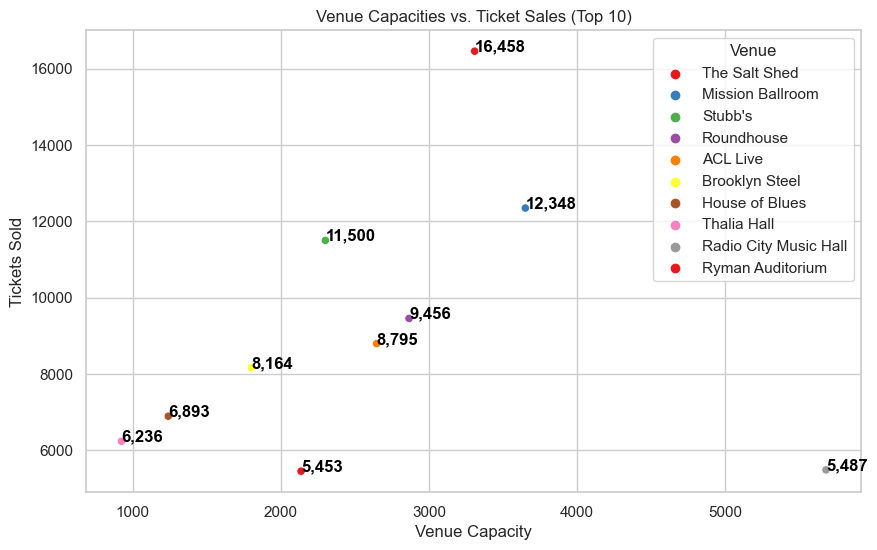

In [55]:
# Distribution of performances across venues
venue_distribution = artists['Venue'].value_counts()

# Visualize distribution of performances across venues
plt.figure(figsize=(10, 6))
sns.barplot(x=venue_distribution.head(10).values, y=venue_distribution.head(10).index)
plt.title('Distribution of Performances Across Venues (Top 10)')
plt.xlabel('Number of Performances')
plt.ylabel('Venue')
plt.show()

# Summary statistics for venue capacities and ticket sales
venue_summary = artists.groupby('Venue').agg({'Capacity': 'mean', 'Tickets Sold': 'sum'})
venue_summary = venue_summary.sort_values(by='Tickets Sold', ascending=False)

# Visualize venue capacities and ticket sales for popular venues
plt.figure(figsize=(10, 6))
scatterplot = sns.scatterplot(x='Capacity', y='Tickets Sold', data=venue_summary.head(10), hue=venue_summary.head(10).index, palette='Set1')
plt.title('Venue Capacities vs. Ticket Sales (Top 10)')
plt.xlabel('Venue Capacity')
plt.ylabel('Tickets Sold')
plt.legend(title='Venue')

# Add annotations for each point with numerical values (ticket sales)
for line in range(0, venue_summary.head(10).shape[0]):
    scatterplot.text(venue_summary.head(10)['Capacity'][line] + 0.5, venue_summary.head(10)['Tickets Sold'][line], f"{venue_summary.head(10)['Tickets Sold'][line]:,.0f}", horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.show()

By creating a bar graph we are able to visually interpret the frequency of performances played at the top 10 venues. By creating a scatterplot we are able to visually interpret the relationship between Capacity and Ticket Sales, with displaying the top 10 venues with the most ticket sales and their capacities. 

This provides insight into the performance and characteristics of the most successful venues in terms of audience attendance and ticket revenue.

### ✨ Data Visual : Monthly, Weekly, & Daily Ticket Sales 📊

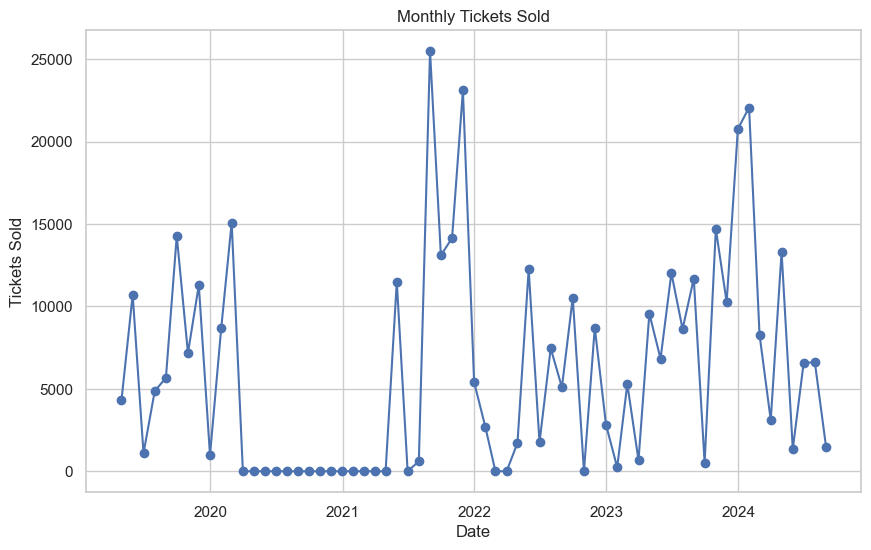

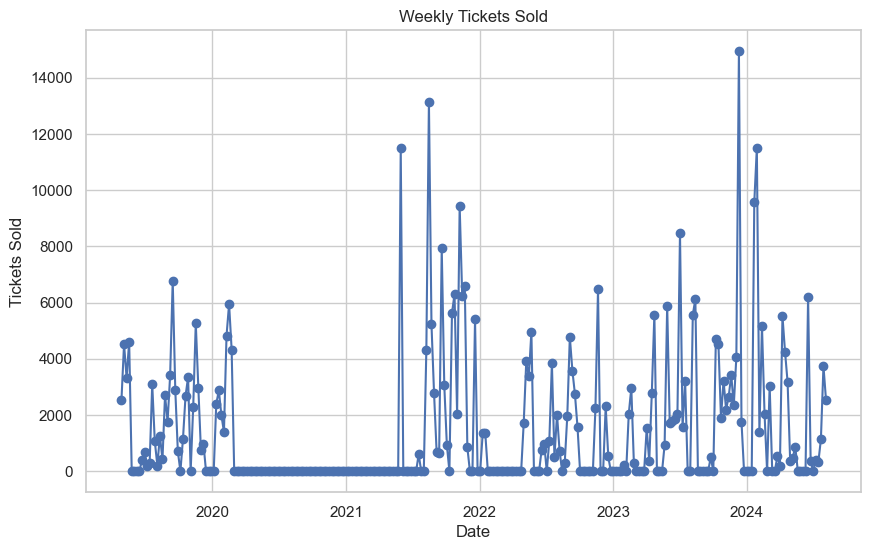

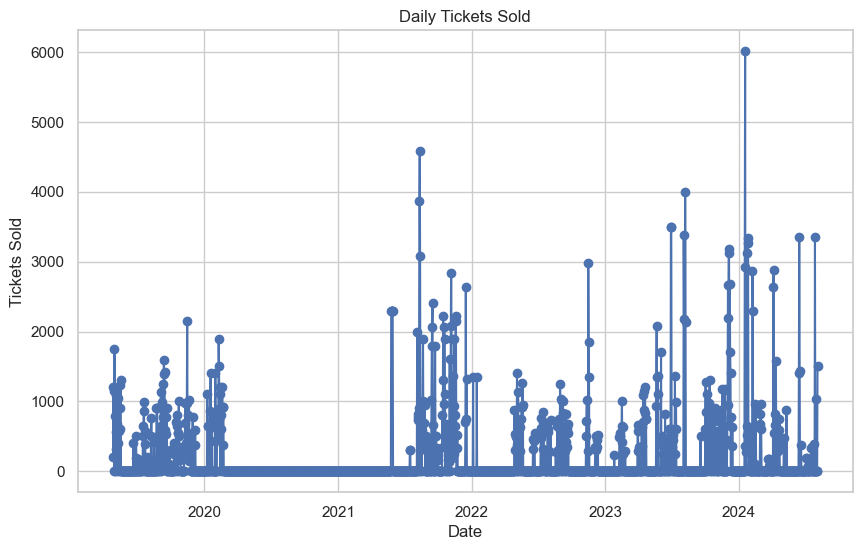

In [56]:
# Convert 'Date' column to datetime type with mixed format inference
artists['Date'] = pd.to_datetime(artists['Date'], format='mixed')

# Set 'Date' column as the index
artists.set_index('Date', inplace=True)

# Resample data by month and aggregate performance metrics (e.g., tickets sold)
monthly_performance = artists.resample('M').sum()

# Plot monthly performance metrics
plt.figure(figsize=(10, 6))
plt.plot(monthly_performance.index, monthly_performance['Tickets Sold'], marker='o', linestyle='-')
plt.title('Monthly Tickets Sold')
plt.xlabel('Date')
plt.ylabel('Tickets Sold')
plt.grid(True)
plt.show()

# Resample data by week and aggregate performance metrics
weekly_performance = artists.resample('W').sum()

# Plot weekly performance metrics
plt.figure(figsize=(10, 6))
plt.plot(weekly_performance.index, weekly_performance['Tickets Sold'], marker='o', linestyle='-')
plt.title('Weekly Tickets Sold')
plt.xlabel('Date')
plt.ylabel('Tickets Sold')
plt.grid(True)
plt.show()

# Resample data by day and aggregate performance metrics
daily_performance = artists.resample('D').sum()

# Plot daily performance metrics
plt.figure(figsize=(10, 6))
plt.plot(daily_performance.index, daily_performance['Tickets Sold'], marker='o', linestyle='-')
plt.title('Daily Tickets Sold')
plt.xlabel('Date')
plt.ylabel('Tickets Sold')
plt.grid(True)
plt.show()


In creating three separate line plots we are able to visually interpret temporal patterns of tickets sales on a monthly, weekly, and daily basis. As we can see there is a noticeable drop in ticket sales around 2020 and some of 2021, this could be a reflection of the pandemic and its effect on in-person live events.

### ✨ Data Visual : Most Frequently Performing Artists & Tickets Sales Per Artists 📊

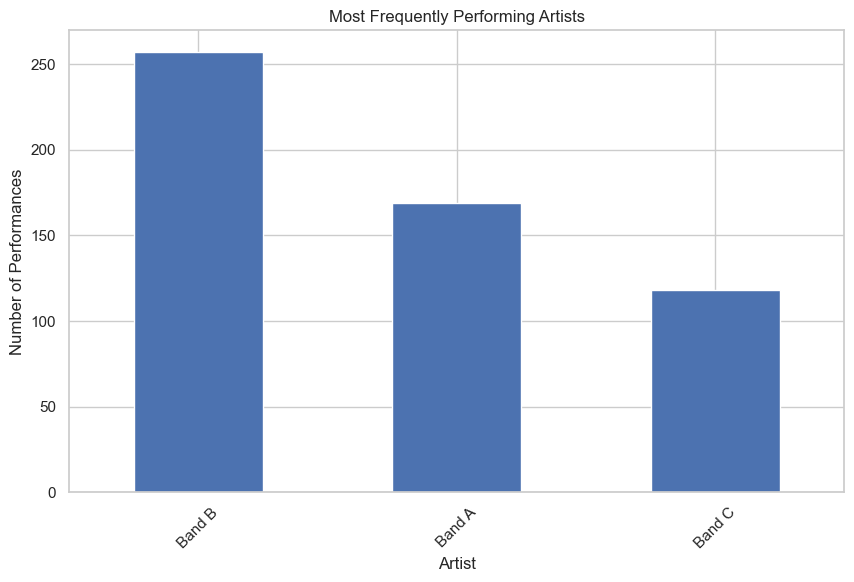

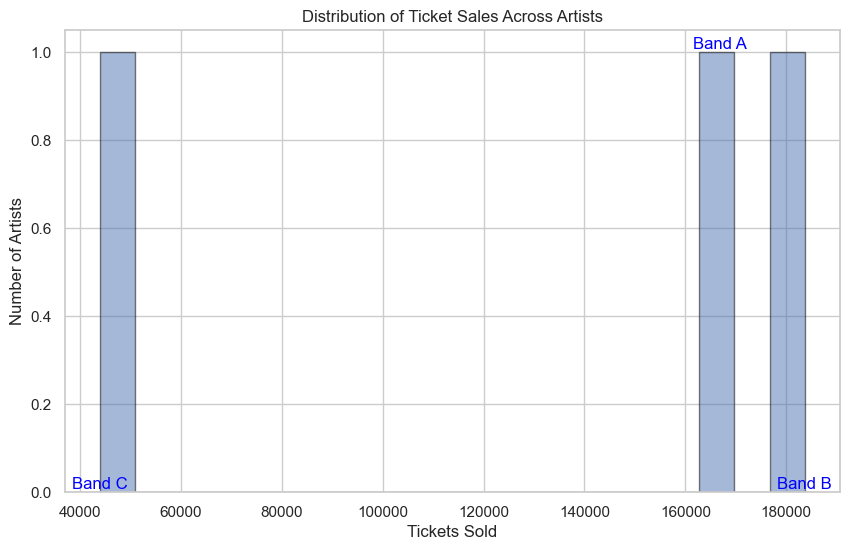

In [57]:
# Identify the most frequently performing artists
most_frequent_artists = artists['Artist'].value_counts().head(3)

# Visualize the most frequently performing artists
plt.figure(figsize=(10, 6))
most_frequent_artists.plot(kind='bar')
plt.title('Most Frequently Performing Artists')
plt.xlabel('Artist')
plt.ylabel('Number of Performances')
plt.xticks(rotation=45)
plt.show()

# Analyze the distribution of ticket sales for different artists
artist_ticket_sales = artists.groupby('Artist')['Tickets Sold'].sum()

# Visualize the distribution of ticket sales across different artists with labels
plt.figure(figsize=(10, 6))
bars = plt.hist(artist_ticket_sales, bins=20, edgecolor='black', alpha=0.5)

# Manually assign labels to each bar
for i, (artist, tickets_sold) in enumerate(artist_ticket_sales.items()):
    plt.text(tickets_sold, bars[0][i], artist, ha='center', va='bottom', color='blue')

plt.title('Distribution of Ticket Sales Across Artists')
plt.xlabel('Tickets Sold')
plt.ylabel('Number of Artists')
plt.grid(True)
plt.show()

By creating the bar graph we are able to visually interpret which of the three artists performs the most, this is conducted by counting the amount of performances each band played. As we can see, Band B has had the most number of performances, Band A with second place in most performances, and Band C in last with least amount of performances.

By creating the histogram we are able to visually interpret the distribution of ticket sales across the three artists in the dataset.

## Feature Engineering ⚙️

In [58]:
# Reset the index to restore 'Date' column as a regular column
artists.reset_index(inplace=True)

# Check if the 'Date' column is now present
print(artists.head())

# Now you can proceed with further analysis or feature engineering involving the 'Date' column


        Date  Artist         City Region/State/Province        Country  \
0 2019-05-15  Band A     Brooklyn              New York  United States   
1 2019-06-21  Band A       Austin                 Texas  United States   
2 2019-06-28  Band A       Dallas                 Texas  United States   
3 2019-06-29  Band A  Bentonville              Arkansas  United States   
4 2019-07-04  Band A      Toronto               Ontario         Canada   

                 Venue  Capacity  Tickets Sold  Tickets Left  
0     Knitting Factory     325.0         325.0             0  
1             Antone's     400.0         400.0             0  
2  The Kessler Theater     600.0         508.0            92  
3      Crystal Bridges    2000.0         187.0          1813  
4          Drake Hotel     200.0         170.0            30  


In [59]:
# Convert 'Date' column to datetime type
artists['Date'] = pd.to_datetime(artists['Date'])

# Extract day of the week, month, and year
artists['DayOfWeek'] = artists['Date'].dt.dayofweek
artists['Month'] = artists['Date'].dt.month
artists['Year'] = artists['Date'].dt.year

# Optional: Map day of the week and month to their names
artists['DayOfWeek'] = artists['DayOfWeek'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
artists['Month'] = artists['Month'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})


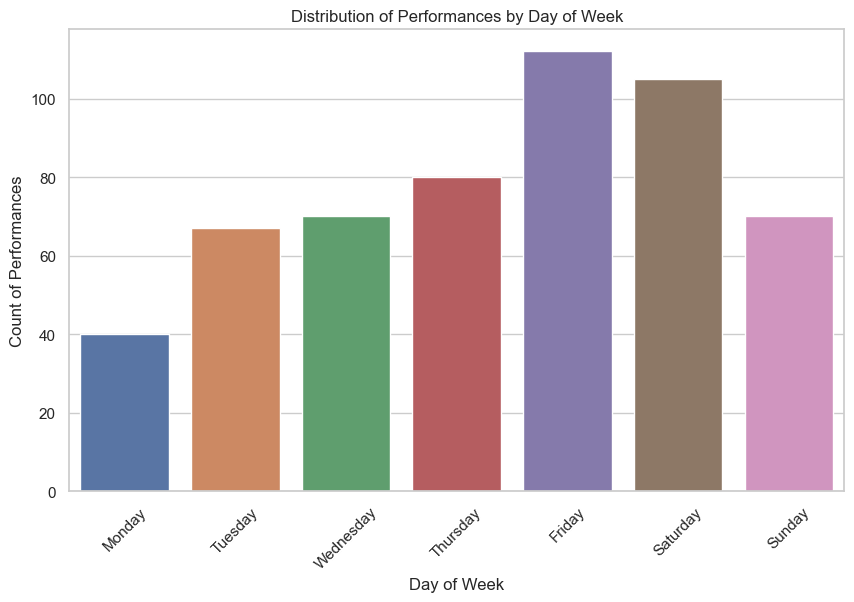

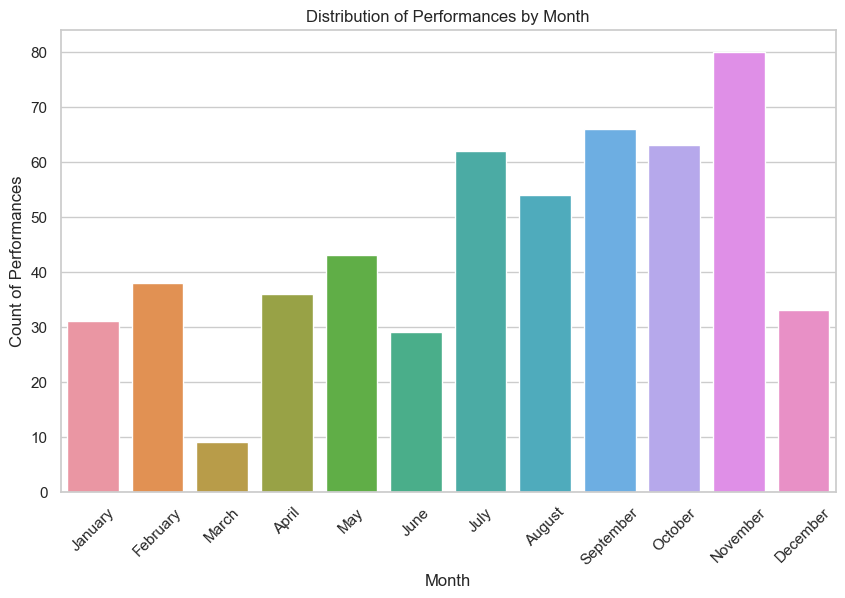

In [60]:
# Calculate the count of performances by day of week
performances_by_dayofweek = artists.groupby('DayOfWeek').size().reset_index(name='Count')

# Calculate the count of performances by month
performances_by_month = artists.groupby('Month').size().reset_index(name='Count')

# Visualize distribution of performances by day of week
plt.figure(figsize=(10, 6))
sns.barplot(x='DayOfWeek', y='Count', data=performances_by_dayofweek, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribution of Performances by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count of Performances')
plt.xticks(rotation=45)
plt.show()

# Visualize distribution of performances by month
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Count', data=performances_by_month, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Distribution of Performances by Month')
plt.xlabel('Month')
plt.ylabel('Count of Performances')
plt.xticks(rotation=45)
plt.show()

In [61]:
# Calculate the number of tickets left
artists['Tickets Left'] = artists['Capacity'] - artists['Tickets Sold']

# Create a new binary column indicating sold-out status
artists['Sold Out'] = (artists['Tickets Left'] == 0).astype(int)

In [62]:
artists.head()

,Date,Artist,City,Region/State/Province,Country,Venue,Capacity,Tickets Sold,Tickets Left,DayOfWeek,Month,Year,Sold Out
0,2019-05-15,Band A,Brooklyn,New York,United States,Knitting Factory,325.0,325.0,0.0,Wednesday,May,2019,1
1,2019-06-21,Band A,Austin,Texas,United States,Antone's,400.0,400.0,0.0,Friday,June,2019,1
2,2019-06-28,Band A,Dallas,Texas,United States,The Kessler Theater,600.0,508.0,92.0,Friday,June,2019,0
3,2019-06-29,Band A,Bentonville,Arkansas,United States,Crystal Bridges,2000.0,187.0,1813.0,Saturday,June,2019,0
4,2019-07-04,Band A,Toronto,Ontario,Canada,Drake Hotel,200.0,170.0,30.0,Thursday,July,2019,0


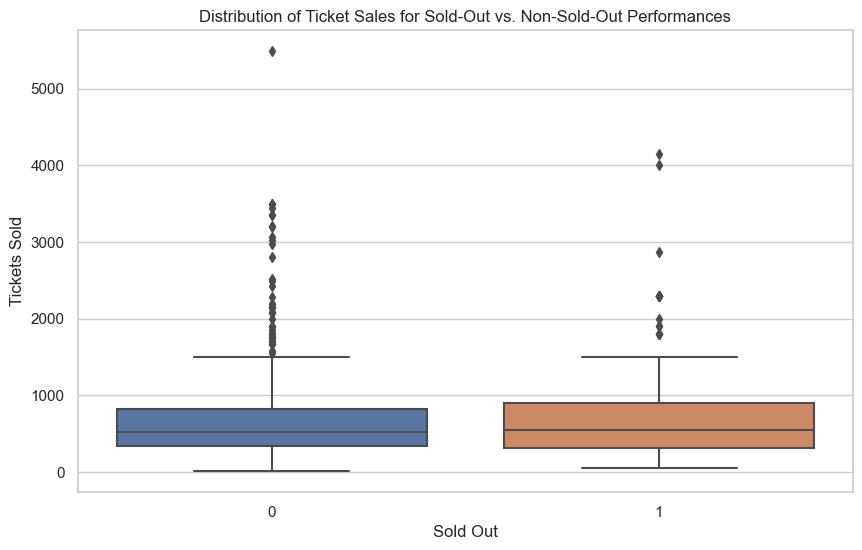

In [63]:
# Visualize the distribution of ticket sales for sold-out and non-sold-out performances
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sold Out', y='Tickets Sold', data=artists)
plt.title('Distribution of Ticket Sales for Sold-Out vs. Non-Sold-Out Performances')
plt.xlabel('Sold Out')
plt.ylabel('Tickets Sold')
plt.show()

In [64]:
artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   544 non-null    datetime64[ns]
 1   Artist                 544 non-null    object        
 2   City                   544 non-null    object        
 3   Region/State/Province  472 non-null    object        
 4   Country                544 non-null    object        
 5   Venue                  544 non-null    object        
 6   Capacity               544 non-null    float64       
 7   Tickets Sold           544 non-null    float64       
 8   Tickets Left           544 non-null    float64       
 9   DayOfWeek              544 non-null    object        
 10  Month                  544 non-null    object        
 11  Year                   544 non-null    int32         
 12  Sold Out               544 non-null    int64         
dtypes: da

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

artists_model = artists.copy()

artists_model.head()

,Date,Artist,City,Region/State/Province,Country,Venue,Capacity,Tickets Sold,Tickets Left,DayOfWeek,Month,Year,Sold Out
0,2019-05-15,Band A,Brooklyn,New York,United States,Knitting Factory,325.0,325.0,0.0,Wednesday,May,2019,1
1,2019-06-21,Band A,Austin,Texas,United States,Antone's,400.0,400.0,0.0,Friday,June,2019,1
2,2019-06-28,Band A,Dallas,Texas,United States,The Kessler Theater,600.0,508.0,92.0,Friday,June,2019,0
3,2019-06-29,Band A,Bentonville,Arkansas,United States,Crystal Bridges,2000.0,187.0,1813.0,Saturday,June,2019,0
4,2019-07-04,Band A,Toronto,Ontario,Canada,Drake Hotel,200.0,170.0,30.0,Thursday,July,2019,0


In [66]:
features = ['City', 'Venue', 'Tickets Left', 'Capacity']
le = LabelEncoder()

for feature in features:
    le.fit(artists_model[feature].unique())
    artists_model[feature] = le.transform(artists_model[feature])
    print(feature, artists_model[feature].unique())

artists_model.head()

City [ 34  16  53  22 191  37 153  51 116 134  54 128 184  68  59  30 155 137
  19  27  40  44 203  70 138 131 151   5 185 125 175  57 169 198  20 178
 156 172 115 171 152 193 170 118 127  98  95 142  60  12  81  46 105  47
  17 104 147   0 164  23  49   6  35 192  33 114 120  79  62 195  86  64
   8  91  87 200 212  24 109 133 119 143 188  61 140 136 197  52  89 161
 101 132 144  28  18  10 163 135  92  99  26 129 183  67   7 177  11  14
  66  74 141  93 210  25  80 196 107 145 110 108 179 199 174 181 173  21
  42 100 187 190  58 207 208 162  15 148 102 154 112  72  75 103 201   4
  96 111 165   1  85  45  97 130 180  83   2 121  63 146 194 106 167  29
  32  31 117 160  84 182  90  36  94  13 150  43  50  65 166   3  73  69
 186  41  77 168 149 204 202 206 123  56 139  88 189   9 113  82 176  38
  55  39 157  48 209 126 205 158  76 211  71  78 159 122 124]
Venue [132  19 284  76  85 176 241 254 115 134 303   5 231 239  87  41 102 160
 168 164 364  58 312 336 245 125 199 276 314  45 25

,Date,Artist,City,Region/State/Province,Country,Venue,Capacity,Tickets Sold,Tickets Left,DayOfWeek,Month,Year,Sold Out
0,2019-05-15,Band A,34,New York,United States,132,21,325.0,18,Wednesday,May,2019,1
1,2019-06-21,Band A,16,Texas,United States,19,28,400.0,18,Friday,June,2019,1
2,2019-06-28,Band A,53,Texas,United States,284,43,508.0,56,Friday,June,2019,0
3,2019-06-29,Band A,22,Arkansas,United States,76,135,187.0,280,Saturday,June,2019,0
4,2019-07-04,Band A,191,Ontario,Canada,85,12,170.0,32,Thursday,July,2019,0


In [67]:
artists_model.describe()

,Date,City,Venue,Capacity,Tickets Sold,Tickets Left,Year,Sold Out
count,544,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000
mean,2022-01-26 16:11:28.235293952,102.963235,179.474265,72.579044,725.253676,96.586397,2021.498162,0.356618
min,2019-04-26 00:00:00,0.000000,0.000000,0.000000,12.000000,0.000000,2019.000000,0.000000
25%,2020-02-03 18:00:00,46.000000,87.750000,36.000000,334.000000,18.000000,2020.000000,0.000000
50%,2022-05-07 00:00:00,108.500000,180.000000,64.000000,524.500000,58.500000,2022.000000,0.000000
75%,2023-08-08 06:00:00,156.000000,267.000000,106.000000,852.250000,172.250000,2023.000000,1.000000
max,2024-08-04 00:00:00,212.000000,364.000000,176.000000,5487.000000,293.000000,2024.000000,1.000000
std,NaN,60.711667,104.749193,45.189525,675.987241,89.795408,1.733644,0.479441


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define features (X) and target variable (y)
X = artists_model[['City', 'Venue', 'Tickets Left', 'Capacity']]
y = artists_model['Tickets Sold']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate model performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 150530.28263267077


In [69]:
# Analyze coefficients
coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
coef_df.sort_values(by='Coefficient', ascending=False, inplace=True)
print(coef_df)


        Feature  Coefficient
3      Capacity    15.427212
1         Venue    -0.003224
0          City    -0.153185
2  Tickets Left    -4.653367


In [70]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)


In [71]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest model
rf_model = RandomForestRegressor()

# Fit the model to the data
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate model performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error (Random Forest):", mse_rf)


Mean Squared Error (Random Forest): 58508.63959633028


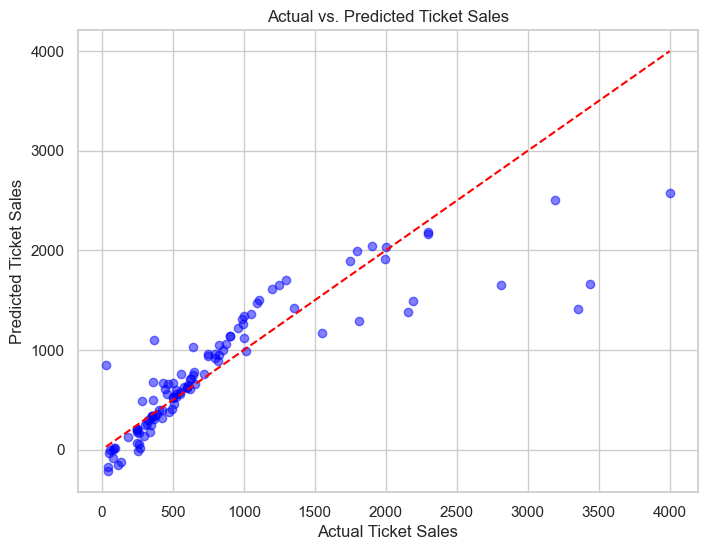

In [72]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs. Predicted Ticket Sales')
plt.xlabel('Actual Ticket Sales')
plt.ylabel('Predicted Ticket Sales')
plt.grid(True)
plt.show()
